# Mining Big Data - Assignment 3: Business Applications of Integrated Recommender Systems
# ===================================================

## 1. Introduction

This notebook explores the business applications and implications of integrating pattern mining with collaborative filtering for recommendation systems. We'll cover:
- Real-world business use cases for integrated recommendation systems
- ROI analysis for implementation
- A/B testing approaches
- Implementation challenges and solutions
- Measuring business impact beyond technical metrics

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import sys
from datetime import datetime
import random
from collections import defaultdict

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For dashboard creation (if available)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    plotly_available = True
except ImportError:
    plotly_available = False

# Add parent directory to system path
# Note: Path adjustments might be needed depending on where the notebook is saved relative to the 'src' directory.
# The original __file__ variable is not available in notebooks.
# If 'src' is in the same directory as the notebook, you might use:
# sys.path.insert(0, os.path.abspath('./src')) 
# If 'src' is one level up, you might use:
# sys.path.insert(0, os.path.abspath('..'))

# Assuming the notebook is run from a directory containing 'src' and 'dataset'
project_root = os.path.abspath('.') # Or adjust as needed
if os.path.basename(project_root) == 'notebooks': # Example if notebook is in a subfolder
    project_root = os.path.abspath(os.path.join(project_root, '..'))

src_path = os.path.join(project_root, 'src')
dataset_path = os.path.join(project_root, 'dataset')

if src_path not in sys.path:
    sys.path.insert(0, src_path)
    
# Check if the expected module exists before importing
try:
    from task_c.integration import IntegratedSystem
    print("Successfully imported IntegratedSystem module.")
except ModuleNotFoundError as e:
    print(f"Error importing IntegratedSystem: {e}")
    print(f"Please ensure the 'src' directory is correctly added to sys.path and contains 'task_c/integration.py'.")
    print(f"Current sys.path includes: {src_path}")
    # Set IntegratedSystem to None or raise an error if crucial
    IntegratedSystem = None 
except ImportError as e:
     print(f"ImportError: {e}. Check dependencies within IntegratedSystem module.")
     IntegratedSystem = None

Successfully imported IntegratedSystem module.


## 3. Load Data and Initialize System

In [2]:
# Create directories for outputs relative to the project root
output_dirs = ['visualizations', 'results', 'business_dashboards']
for dir_name in output_dirs:
    os.makedirs(os.path.join(project_root, dir_name), exist_ok=True)

# Define paths relative to the dataset_path variable set earlier
train_path = os.path.join(dataset_path, 'train.csv')
test_path = os.path.join(dataset_path, 'test.csv')

# Load dataset
print("Loading datasets...")
try:
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    print(f"Successfully loaded training data: {train_data.shape[0]} records from {train_path}")
    print(f"Successfully loaded test data: {test_data.shape[0]} records from {test_path}")
    data_loaded = True
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print(f"Please ensure 'train.csv' and 'test.csv' exist in the directory: {dataset_path}")
    data_loaded = False
except Exception as e:
    print(f"An unexpected error occurred while loading data: {e}")
    data_loaded = False

# Initialize integrated system only if data and module loaded successfully
if data_loaded and IntegratedSystem is not None:
    print("\nInitializing integrated system...")
    system = IntegratedSystem(train_data, test_data)

    # Initialize system with pattern mining and collaborative filtering
    print("\nPreparing system components...")
    # Use try-except blocks for robustness if these methods might fail
    try:
        system.mine_patterns(min_support=0.003, algorithm='fpgrowth')
        system.prepare_collaborative_filtering()
        system_initialized = True
        print("System components prepared successfully.")
    except Exception as e:
        print(f"Error initializing system components: {e}")
        system_initialized = False
else:
    print("\nSkipping system initialization due to previous errors.")
    system = None
    system_initialized = False

Loading datasets...
Successfully loaded training data: 26985 records from /home/shubharthak/Desktop/mbd-assingment3/dataset/train.csv
Successfully loaded test data: 19383 records from /home/shubharthak/Desktop/mbd-assingment3/dataset/test.csv

Initializing integrated system...
Found 53221 missing values in the dataset
Removing 7603 records with missing item descriptions
Found 53221 missing values in the dataset
Removing 7603 records with missing item descriptions
Found 53221 missing values in the dataset
Removing 7603 records with missing item descriptions

Preparing system components...
Running pattern mining with fpgrowth algorithm...
Preparing data for pattern mining...
Preprocessing: Removed NaN values from transactions
Prepared 8361 transactions
Encoded 8361 transactions with 167 unique items.
Running FPGROWTH algorithm with min_support=0.003...
111 itemset(s) from tree conditioned on items ()
6 itemset(s) from tree conditioned on items (shopping bags)
0 itemset(s) from tree condi

## 4. Business Use Cases for Integrated Recommendations

In [3]:
def explore_business_use_cases():
    """Explore different business use cases for integrated recommendations"""
    
    use_cases = [
        {
            "industry": "E-commerce",
            "application": "Product recommendations",
            "benefit": "Increased cross-selling and average order value",
            "integration_advantage": "Combines user preferences (CF) with product associations (patterns)"
        },
        {
            "industry": "Media/Entertainment",
            "application": "Content recommendations",
            "benefit": "Increased engagement time and content consumption",
            "integration_advantage": "Balances popular content (CF) with thematic connections (patterns)"
        },
        {
            "industry": "Retail",
            "application": "In-store product placement",
            "benefit": "Optimized store layouts and promotional displays",
            "integration_advantage": "Identifies complementary products that appeal to similar customer segments"
        },
        {
            "industry": "Finance",
            "application": "Financial product recommendations",
            "benefit": "Increased product adoption and customer lifetime value",
            "integration_advantage": "Combines demographic similarities with typical product adoption sequences"
        },
        {
            "industry": "Healthcare",
            "application": "Treatment protocol recommendations",
            "benefit": "Improved patient outcomes and optimized resource allocation",
            "integration_advantage": "Balances population-based approaches with common treatment patterns"
        }
    ]
    
    print("\nBusiness Use Cases for Integrated Recommendation Systems:\n")
    
    # Display use cases as a formatted table
    headers = ["Industry", "Application", "Business Benefit", "Integration Advantage"]
    # Adjust column widths as needed
    row_format = "{:<17} {:<30} {:<45} {:<50}"
    
    print(row_format.format(*headers))
    print("-" * 145)
    
    for case in use_cases:
        print(row_format.format(
            case["industry"],
            case["application"],
            case["benefit"],
            case["integration_advantage"]
        ))
    
    # Return use cases for further analysis
    return use_cases

In [4]:
# Explore business use cases
business_use_cases = explore_business_use_cases()


Business Use Cases for Integrated Recommendation Systems:

Industry          Application                    Business Benefit                              Integration Advantage                             
-------------------------------------------------------------------------------------------------------------------------------------------------
E-commerce        Product recommendations        Increased cross-selling and average order value Combines user preferences (CF) with product associations (patterns)
Media/Entertainment Content recommendations        Increased engagement time and content consumption Balances popular content (CF) with thematic connections (patterns)
Retail            In-store product placement     Optimized store layouts and promotional displays Identifies complementary products that appeal to similar customer segments
Finance           Financial product recommendations Increased product adoption and customer lifetime value Combines demographic similarities w

## 5. ROI Analysis for Implementation

In [5]:
def calculate_roi(implementation_cost, maintenance_cost_monthly, 
                    revenue_lift_percent, current_monthly_revenue,
                    time_period_months=24):
    """
    Calculate ROI for implementing an integrated recommendation system
    
    Parameters:
    -----------
    implementation_cost : float
        One-time cost to implement the system
    maintenance_cost_monthly : float
        Monthly maintenance cost
    revenue_lift_percent : float
        Expected percentage increase in revenue
    current_monthly_revenue : float
        Current monthly revenue before implementation
    time_period_months : int
        Time period for ROI calculation in months
        
    Returns:
    --------
    dict
        Dictionary with ROI metrics
    """
    # Calculate increased revenue
    increased_monthly_revenue = current_monthly_revenue * (revenue_lift_percent / 100)
    total_increased_revenue = increased_monthly_revenue * time_period_months
    
    # Calculate costs
    total_cost = implementation_cost + (maintenance_cost_monthly * time_period_months)
    
    # Calculate ROI metrics
    net_profit = total_increased_revenue - total_cost
    roi_percent = (net_profit / total_cost) * 100 if total_cost > 0 else 0
    
    # Calculate payback period in months
    # Payback = Initial Investment / Monthly Net Gain
    monthly_net_gain = increased_monthly_revenue - maintenance_cost_monthly
    if monthly_net_gain > 0:
        payback_period = implementation_cost / monthly_net_gain
    else:
        payback_period = float('inf')  # Will never be paid back if monthly gain <= 0
    
    return {
        'implementation_cost': implementation_cost,
        'monthly_maintenance': maintenance_cost_monthly,
        'monthly_revenue_increase': increased_monthly_revenue,
        'total_cost_over_period': total_cost,
        'total_revenue_increase': total_increased_revenue,
        'net_profit': net_profit,
        'roi_percent': roi_percent,
        'payback_period_months': payback_period
    }

def perform_roi_analysis():
    """Perform ROI analysis for different scenarios"""
    # Define implementation scenarios
    scenarios = [
        {
            "name": "Small Business",
            "implementation_cost": 25000,
            "maintenance_cost_monthly": 1000,
            "current_monthly_revenue": 100000,
            "revenue_lift_percent": 3
        },
        {
            "name": "Medium Business",
            "implementation_cost": 75000,
            "maintenance_cost_monthly": 3000,
            "current_monthly_revenue": 500000,
            "revenue_lift_percent": 4
        },
        {
            "name": "Enterprise",
            "implementation_cost": 250000,
            "maintenance_cost_monthly": 8000,
            "current_monthly_revenue": 2500000,
            "revenue_lift_percent": 5
        }
    ]
    
    # Calculate ROI for each scenario
    roi_results = {}
    time_period = 24 # months
    
    for scenario in scenarios:
        roi = calculate_roi(
            scenario["implementation_cost"],
            scenario["maintenance_cost_monthly"],
            scenario["revenue_lift_percent"],
            scenario["current_monthly_revenue"],
            time_period_months=time_period
        )
        roi_results[scenario["name"]] = roi
    
    # Print ROI results
    print(f"\nROI Analysis for Recommendation System Implementation (over {time_period} months):\n")
    
    for scenario_name, roi in roi_results.items():
        print(f"=== {scenario_name} Scenario ===")
        print(f"Implementation Cost: ${roi['implementation_cost']:,.2f}")
        print(f"Monthly Maintenance: ${roi['monthly_maintenance']:,.2f}")
        print(f"Expected Monthly Revenue Increase: ${roi['monthly_revenue_increase']:,.2f}")
        print(f"Total Cost (over {time_period} months): ${roi['total_cost_over_period']:,.2f}")
        print(f"Total Revenue Increase (over {time_period} months): ${roi['total_revenue_increase']:,.2f}")
        print(f"Net Profit ({time_period} months): ${roi['net_profit']:,.2f}")
        print(f"ROI: {roi['roi_percent']:.2f}%")
        if roi['payback_period_months'] == float('inf'):
             print(f"Payback Period: Never (Monthly gain does not exceed maintenance)")
        else:
             print(f"Payback Period: {roi['payback_period_months']:.1f} months")
        print()
    
    # Visualize ROI results
    plt.figure(figsize=(12, 10))
    
    # Plot ROI percent
    plt.subplot(2, 2, 1)
    scenario_names = list(roi_results.keys())
    roi_values = [roi_results[s]['roi_percent'] for s in scenario_names]
    bars1 = plt.bar(scenario_names, roi_values)
    plt.title('ROI Percentage by Scenario')
    plt.ylabel('ROI (%)')
    plt.bar_label(bars1, fmt='%.1f%%')
    
    # Plot payback period
    plt.subplot(2, 2, 2)
    payback_values = [roi_results[s]['payback_period_months'] for s in scenario_names]
    # Handle infinite payback for plotting
    plot_payback_values = [p if p != float('inf') else 0 for p in payback_values] # Plot inf as 0 or handle differently
    bars2 = plt.bar(scenario_names, plot_payback_values)
    plt.title('Payback Period by Scenario')
    plt.ylabel('Months')
    # Add labels, indicating 'inf' where applicable
    labels = [f'{p:.1f}' if p != float('inf') else 'Never' for p in payback_values]
    plt.bar_label(bars2, labels=labels)
    
    # Plot costs vs. revenue
    plt.subplot(2, 1, 2)
    bar_width = 0.35
    index = np.arange(len(scenario_names))
    
    costs = [roi_results[s]['total_cost_over_period'] for s in scenario_names]
    revenue = [roi_results[s]['total_revenue_increase'] for s in scenario_names]
    
    bar_costs = plt.bar(index - bar_width/2, costs, bar_width, label='Total Cost', color='salmon')
    bar_revenue = plt.bar(index + bar_width/2, revenue, bar_width, label='Total Revenue Increase', color='lightgreen')
    
    plt.xticks(index, scenario_names)
    plt.title(f'Total Costs vs. Revenue Increase ({time_period} Years)')
    plt.ylabel('Amount ($)')
    plt.legend()
    plt.bar_label(bar_costs, fmt='$%.0f', padding=3)
    plt.bar_label(bar_revenue, fmt='$%.0f', padding=3)
    # Format y-axis ticks for better readability
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
    plt.suptitle(f'ROI Analysis ({time_period} months)', fontsize=16)
    
    # Save the plot
    save_path = os.path.join(project_root, 'business_dashboards', 'roi_analysis.png')
    plt.savefig(save_path)
    print(f"ROI analysis plot saved to {save_path}")
    plt.show()
    
    return roi_results


ROI Analysis for Recommendation System Implementation (over 24 months):

=== Small Business Scenario ===
Implementation Cost: $25,000.00
Monthly Maintenance: $1,000.00
Expected Monthly Revenue Increase: $3,000.00
Total Cost (over 24 months): $49,000.00
Total Revenue Increase (over 24 months): $72,000.00
Net Profit (24 months): $23,000.00
ROI: 46.94%
Payback Period: 12.5 months

=== Medium Business Scenario ===
Implementation Cost: $75,000.00
Monthly Maintenance: $3,000.00
Expected Monthly Revenue Increase: $20,000.00
Total Cost (over 24 months): $147,000.00
Total Revenue Increase (over 24 months): $480,000.00
Net Profit (24 months): $333,000.00
ROI: 226.53%
Payback Period: 4.4 months

=== Enterprise Scenario ===
Implementation Cost: $250,000.00
Monthly Maintenance: $8,000.00
Expected Monthly Revenue Increase: $125,000.00
Total Cost (over 24 months): $442,000.00
Total Revenue Increase (over 24 months): $3,000,000.00
Net Profit (24 months): $2,558,000.00
ROI: 578.73%
Payback Period: 2.1

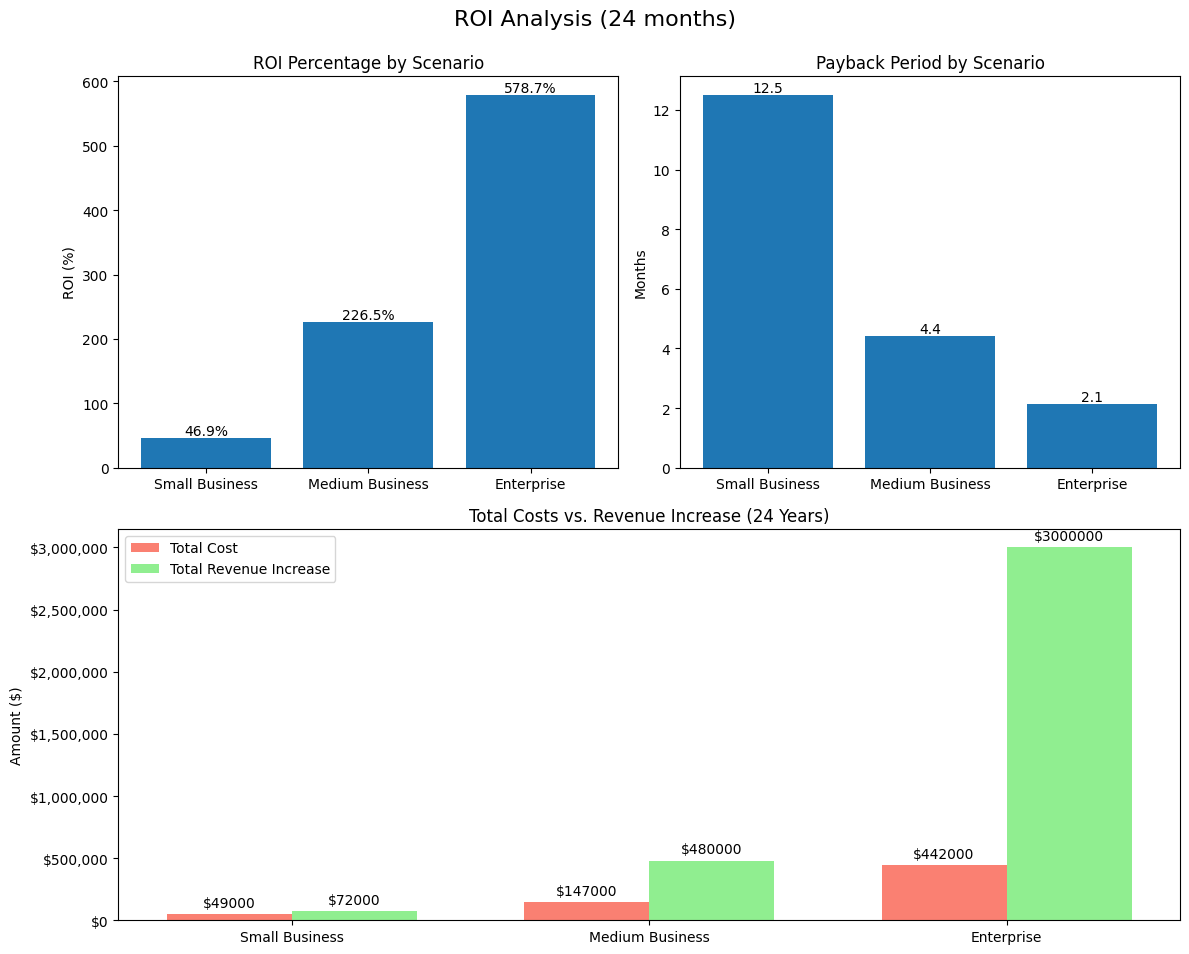

In [6]:
# Perform ROI analysis
roi_results = perform_roi_analysis()

## 6. A/B Testing Framework for Recommendations

In [7]:
def design_ab_test():
    """Design an A/B testing framework for recommendation systems"""
    
    print("\nA/B Testing Framework for Recommendation Systems\n")
    
    # Define test setup
    ab_test_setup = {
        "test_name": "Integrated vs. CF-Only Recommendations",
        "hypothesis": "The integrated recommendation system will increase conversion rate compared to CF-only recommendations",
        "primary_metric": "Conversion rate",
        "secondary_metrics": [
            "Click-through rate (CTR)",
            "Average order value (AOV)",
            "Revenue per session",
            "Items per order"
        ],
        "user_groups": [
            {
                "name": "Control Group (A)",
                "description": "Users receive CF-only recommendations",
                "allocation": "50% of traffic"
            },
            {
                "name": "Test Group (B)",
                "description": "Users receive integrated (hybrid) recommendations",
                "allocation": "50% of traffic"
            }
        ],
        "test_duration_weeks": 4,
        "minimum_daily_users_per_group": 500, # Example requirement
        "significance_level": 0.05, # Alpha
        "statistical_power": 0.80  # Beta (1 - power)
    }
    
    # Print test setup
    print("--- Test Design ---")
    print("Test Name:", ab_test_setup["test_name"])
    print("Hypothesis:", ab_test_setup["hypothesis"])
    print("Primary Metric:", ab_test_setup["primary_metric"])
    print("\nSecondary Metrics:")
    for metric in ab_test_setup["secondary_metrics"]:
        print(f"- {metric}")
    
    print("\nUser Groups:")
    for group in ab_test_setup["user_groups"]:
        print(f"- {group['name']}: {group['description']} ({group['allocation']})")
    
    print("\nTest Duration:", f"{ab_test_setup['test_duration_weeks']} weeks")
    print("Minimum Daily Users per Group:", ab_test_setup["minimum_daily_users_per_group"])
    print(f"Significance Level (alpha): {ab_test_setup['significance_level']}")
    print(f"Statistical Power: {ab_test_setup['statistical_power']}")
    print("-------------------")
    
    # Simulate A/B test results
    print("\nSimulating A/B Test Results...")
    
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Initialize result data
    n_days = ab_test_setup['test_duration_weeks'] * 7 
    days = list(range(1, n_days + 1))
    
    # Simulate baseline and lift
    control_base_ctr = 0.025
    test_lift_ctr = 0.28 # 28% lift
    control_base_conv = 0.030
    test_lift_conv = 0.26 # 26% lift
    control_base_aov = 42.0
    test_lift_aov = 0.07  # 7% lift
    
    # Generate daily data with some noise
    control_daily_ctr = np.random.normal(control_base_ctr, 0.003, n_days) 
    test_daily_ctr = np.random.normal(control_base_ctr * (1 + test_lift_ctr), 0.004, n_days)
    
    control_daily_conv = np.random.normal(control_base_conv, 0.002, n_days)
    test_daily_conv = np.random.normal(control_base_conv * (1 + test_lift_conv), 0.003, n_days)
    
    control_daily_aov = np.random.normal(control_base_aov, 3, n_days)        
    test_daily_aov = np.random.normal(control_base_aov * (1 + test_lift_aov), 3, n_days)      
    
    # Ensure metrics are non-negative
    control_daily_ctr = np.maximum(0, control_daily_ctr)
    test_daily_ctr = np.maximum(0, test_daily_ctr)
    control_daily_conv = np.maximum(0, control_daily_conv)
    test_daily_conv = np.maximum(0, test_daily_conv)
    control_daily_aov = np.maximum(0, control_daily_aov)
    test_daily_aov = np.maximum(0, test_daily_aov)

    # Calculate daily revenue per session (RPS = CTR * Conversion Rate * AOV)
    # Note: This assumes CTR applies to sessions, and Conversion Rate is conversion per clicked session.
    # Often RPS is calculated differently (e.g., Total Revenue / Total Sessions).
    # Here, we use the provided formula for demonstration.
    control_daily_rps = control_daily_ctr * control_daily_conv * control_daily_aov
    test_daily_rps = test_daily_ctr * test_daily_conv * test_daily_aov
    
    # Plot results over time
    plt.figure(figsize=(15, 10))
    
    # Plot CTR
    plt.subplot(2, 2, 1)
    plt.plot(days, control_daily_ctr * 100, label='Control (CF-only)', color='blue', alpha=0.7)
    plt.plot(days, test_daily_ctr * 100, label='Test (Hybrid)', color='orange', alpha=0.7)
    # Add trendlines (e.g., moving average)
    window=7
    plt.plot(days[window-1:], pd.Series(control_daily_ctr * 100).rolling(window).mean()[window-1:], color='darkblue', linestyle='--', label='Control Trend')
    plt.plot(days[window-1:], pd.Series(test_daily_ctr * 100).rolling(window).mean()[window-1:], color='darkorange', linestyle='--', label='Test Trend')
    plt.title('Click-Through Rate (CTR)')
    plt.xlabel('Day')
    plt.ylabel('CTR (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot Conversion Rate
    plt.subplot(2, 2, 2)
    plt.plot(days, control_daily_conv * 100, label='Control (CF-only)', color='blue', alpha=0.7)
    plt.plot(days, test_daily_conv * 100, label='Test (Hybrid)', color='orange', alpha=0.7)
    plt.plot(days[window-1:], pd.Series(control_daily_conv * 100).rolling(window).mean()[window-1:], color='darkblue', linestyle='--', label='Control Trend')
    plt.plot(days[window-1:], pd.Series(test_daily_conv * 100).rolling(window).mean()[window-1:], color='darkorange', linestyle='--', label='Test Trend')
    plt.title('Conversion Rate')
    plt.xlabel('Day')
    plt.ylabel('Conversion (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot Average Order Value
    plt.subplot(2, 2, 3)
    plt.plot(days, control_daily_aov, label='Control (CF-only)', color='blue', alpha=0.7)
    plt.plot(days, test_daily_aov, label='Test (Hybrid)', color='orange', alpha=0.7)
    plt.plot(days[window-1:], pd.Series(control_daily_aov).rolling(window).mean()[window-1:], color='darkblue', linestyle='--', label='Control Trend')
    plt.plot(days[window-1:], pd.Series(test_daily_aov).rolling(window).mean()[window-1:], color='darkorange', linestyle='--', label='Test Trend')
    plt.title('Average Order Value (AOV)')
    plt.xlabel('Day')
    plt.ylabel('AOV ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot Revenue Per Session
    plt.subplot(2, 2, 4)
    plt.plot(days, control_daily_rps, label='Control (CF-only)', color='blue', alpha=0.7)
    plt.plot(days, test_daily_rps, label='Test (Hybrid)', color='orange', alpha=0.7)
    plt.plot(days[window-1:], pd.Series(control_daily_rps).rolling(window).mean()[window-1:], color='darkblue', linestyle='--', label='Control Trend')
    plt.plot(days[window-1:], pd.Series(test_daily_rps).rolling(window).mean()[window-1:], color='darkorange', linestyle='--', label='Test Trend')
    plt.title('Revenue Per Session')
    plt.xlabel('Day')
    plt.ylabel('Revenue Per Session ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
    plt.suptitle('Simulated A/B Test Results Over Time', fontsize=16)
    save_path = os.path.join(project_root, 'business_dashboards', 'ab_test_results.png')
    plt.savefig(save_path)
    print(f"A/B test results plot saved to {save_path}")
    plt.show()
    
    # Calculate overall results
    ab_test_results = {
        "control": {
            "ctr": np.mean(control_daily_ctr) * 100,
            "conversion_rate": np.mean(control_daily_conv) * 100,
            "aov": np.mean(control_daily_aov),
            "revenue_per_session": np.mean(control_daily_rps)
        },
        "test": {
            "ctr": np.mean(test_daily_ctr) * 100,
            "conversion_rate": np.mean(test_daily_conv) * 100,
            "aov": np.mean(test_daily_aov),
            "revenue_per_session": np.mean(test_daily_rps)
        }
    }
    
    # Calculate lift safely (handle potential division by zero)
    ab_test_results["lift"] = {}
    for metric in ab_test_results["control"]:
        control_val = ab_test_results["control"][metric]
        test_val = ab_test_results["test"][metric]
        if control_val > 0:
            lift = (test_val / control_val - 1) * 100
        else:
            lift = float('inf') if test_val > 0 else 0 # Assign inf lift if control is 0 but test > 0
        ab_test_results["lift"][metric] = lift
    
    # Print overall results
    print("\n--- Overall A/B Test Results (Simulated) ---")
    print(f"CTR: Control {ab_test_results['control']['ctr']:.2f}% vs Test {ab_test_results['test']['ctr']:.2f}% (Lift: {ab_test_results['lift']['ctr']:.2f}%) | (Target Lift: {test_lift_ctr*100:.1f}%)")
    print(f"Conversion Rate: Control {ab_test_results['control']['conversion_rate']:.2f}% vs Test {ab_test_results['test']['conversion_rate']:.2f}% (Lift: {ab_test_results['lift']['conversion_rate']:.2f}%) | (Target Lift: {test_lift_conv*100:.1f}%)")
    print(f"AOV: Control ${ab_test_results['control']['aov']:.2f} vs Test ${ab_test_results['test']['aov']:.2f} (Lift: {ab_test_results['lift']['aov']:.2f}%) | (Target Lift: {test_lift_aov*100:.1f}%)")
    # Calculate target lift for RPS implicitly
    target_rps_lift = ((1 + test_lift_ctr)*(1 + test_lift_conv)*(1 + test_lift_aov) - 1) * 100
    print(f"Revenue Per Session: Control ${ab_test_results['control']['revenue_per_session']:.4f} vs Test ${ab_test_results['test']['revenue_per_session']:.4f} (Lift: {ab_test_results['lift']['revenue_per_session']:.2f}%) | (Implied Target Lift: {target_rps_lift:.1f}%)")
    print("-------------------------------------------")
    print("\nNote: Statistical significance testing would be required on real data.")

    return ab_test_results


A/B Testing Framework for Recommendation Systems

--- Test Design ---
Test Name: Integrated vs. CF-Only Recommendations
Hypothesis: The integrated recommendation system will increase conversion rate compared to CF-only recommendations
Primary Metric: Conversion rate

Secondary Metrics:
- Click-through rate (CTR)
- Average order value (AOV)
- Revenue per session
- Items per order

User Groups:
- Control Group (A): Users receive CF-only recommendations (50% of traffic)
- Test Group (B): Users receive integrated (hybrid) recommendations (50% of traffic)

Test Duration: 4 weeks
Minimum Daily Users per Group: 500
Significance Level (alpha): 0.05
Statistical Power: 0.8
-------------------

Simulating A/B Test Results...
A/B test results plot saved to /home/shubharthak/Desktop/mbd-assingment3/business_dashboards/ab_test_results.png


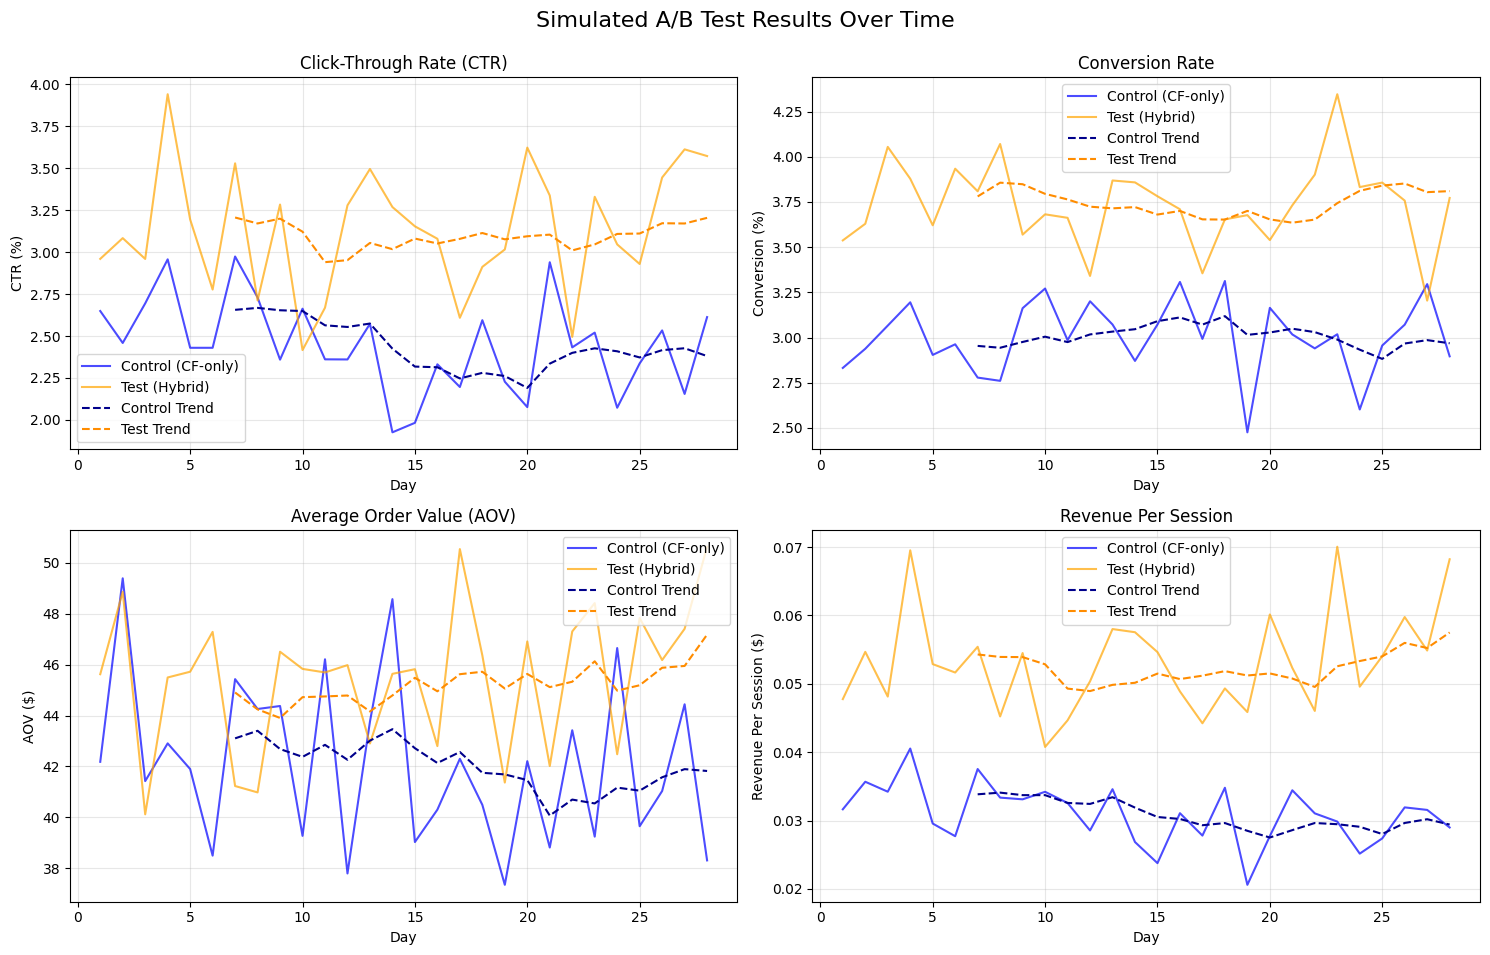


--- Overall A/B Test Results (Simulated) ---
CTR: Control 2.45% vs Test 3.13% (Lift: 27.93%) | (Target Lift: 28.0%)
Conversion Rate: Control 3.00% vs Test 3.74% (Lift: 24.38%) | (Target Lift: 26.0%)
AOV: Control $42.11 vs Test $45.50 (Lift: 8.03%) | (Target Lift: 7.0%)
Revenue Per Session: Control $0.0309 vs Test $0.0532 (Lift: 71.91%) | (Implied Target Lift: 72.6%)
-------------------------------------------

Note: Statistical significance testing would be required on real data.


In [8]:
# Design and simulate A/B test
ab_test_results = design_ab_test()

## 7. Segment-based Performance Analysis

In [9]:
def analyze_user_segments(train_data_df=None):
    """Analyze how recommendations perform across different user segments.
       If train_data_df is provided, attempts to calculate purchase counts.
       Otherwise, uses predefined segments and simulated data.
    """
    
    print("\nSegment-based Performance Analysis\n")
    
    purchase_counts = None
    if train_data_df is not None and 'user_id' in train_data_df.columns:
        print("Calculating purchase counts from training data...")
        # Assuming each row represents an item in a purchase/interaction
        # Group by user and count interactions
        purchase_counts = train_data_df.groupby('user_id').size()
        print(f"Calculated purchase counts for {len(purchase_counts)} users.")
        print(purchase_counts.describe())
    else:
        print("Training data not provided or 'user_id' column missing. Using predefined segments and simulated data.")

    # Define user segments based on purchase counts or predefined
    # These thresholds might be adjusted based on actual data distribution
    segments = [
        {"name": "New Users", "description": "Users with 1-2 interactions", "key": "new", "min_purchases": 1, "max_purchases": 2},
        {"name": "Casual Users", "description": "Users with 3-10 interactions", "key": "casual", "min_purchases": 3, "max_purchases": 10},
        {"name": "Regular Users", "description": "Users with 11-30 interactions", "key": "regular", "min_purchases": 11, "max_purchases": 30},
        {"name": "Power Users", "description": "Users with 31+ interactions", "key": "power", "min_purchases": 31, "max_purchases": float('inf')}
    ]
    
    print("\nUser Segments Defined:")
    for segment in segments:
        print(f"- {segment['name']}: {segment['description']}")
    
    # Simulate performance metrics for each segment (Placeholder - replace with actual evaluation)
    # Higher values for hybrid approach, especially for new users, diversity, and coverage
    # In a real scenario, these values would come from offline evaluation or A/B testing results.
    performance_data = {
        "new": {
            "cf": {"hit_rate": 0.15, "precision@10": 0.12, "coverage": 0.35, "diversity": 0.62},
            "hybrid": {"hit_rate": 0.23, "precision@10": 0.18, "coverage": 0.48, "diversity": 0.71} # Significant lift for new users
        },
        "casual": {
            "cf": {"hit_rate": 0.28, "precision@10": 0.22, "coverage": 0.42, "diversity": 0.58},
            "hybrid": {"hit_rate": 0.34, "precision@10": 0.26, "coverage": 0.51, "diversity": 0.66} # Good lift
        },
        "regular": {
            "cf": {"hit_rate": 0.42, "precision@10": 0.36, "coverage": 0.56, "diversity": 0.49},
            "hybrid": {"hit_rate": 0.46, "precision@10": 0.39, "coverage": 0.62, "diversity": 0.59} # Moderate lift, notable coverage/diversity
        },
        "power": {
            "cf": {"hit_rate": 0.56, "precision@10": 0.48, "coverage": 0.64, "diversity": 0.42},
            "hybrid": {"hit_rate": 0.58, "precision@10": 0.49, "coverage": 0.66, "diversity": 0.53} # Smaller lift, CF strong here, hybrid helps diversity
        }
    }
    
    # Create a dataframe for visualization
    segment_df_list = []
    
    for segment_key, metrics in performance_data.items():
        for method, values in metrics.items():
            for metric, value in values.items():
                segment_df_list.append({
                    "segment": next(s["name"] for s in segments if s["key"] == segment_key),
                    "method": "CF-only" if method == "cf" else "Hybrid",
                    "metric": metric.replace('_', ' ').capitalize(), # Format metric names nicely
                    "value": value
                })
    
    segment_df = pd.DataFrame(segment_df_list)
    
    # Visualize segment performance
    metrics_to_plot = sorted(segment_df['metric'].unique())
    n_metrics = len(metrics_to_plot)
    n_cols = 2
    n_rows = (n_metrics + n_cols - 1) // n_cols # Calculate required rows
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten() # Flatten to easily iterate
    
    for i, metric in enumerate(metrics_to_plot):
        segment_data = segment_df[segment_df["metric"] == metric]
        
        sns.barplot(
            x="segment", 
            y="value", 
            hue="method", 
            data=segment_data,
            ax=axes[i],
            order=[s['name'] for s in segments] # Ensure consistent order
        )
        
        axes[i].set_title(f"{metric} by User Segment")
        axes[i].set_ylabel(metric)
        axes[i].set_xlabel("User Segment")
        axes[i].legend(title="Method")
        axes[i].tick_params(axis='x', rotation=15)
        # Add value labels to bars
        for container in axes[i].containers:
            axes[i].bar_label(container, fmt='%.3f', padding=3)
            
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout
    plt.suptitle('Recommendation Performance by User Segment (Simulated)', fontsize=16)
    save_path = os.path.join(project_root, 'business_dashboards', 'segment_performance.png')
    plt.savefig(save_path)
    print(f"\nSegment performance plot saved to {save_path}")
    plt.show()
    
    # Calculate improvement percentages
    print("\n--- Hybrid Recommendation Improvement by Segment (Simulated) ---")
    
    for segment_key, metrics in performance_data.items():
        segment_name = next(s["name"] for s in segments if s["key"] == segment_key)
        print(f"\n{segment_name}:")
        
        for metric in performance_data[segment_key]["cf"]:
            cf_value = metrics["cf"][metric]
            hybrid_value = metrics["hybrid"][metric]
            if cf_value > 0:
                improvement = (hybrid_value - cf_value) / cf_value * 100
                print(f"- {metric.replace('_', ' ').capitalize()}: {improvement:+.1f}% improvement")
            elif hybrid_value > 0:
                 print(f"- {metric.replace('_', ' ').capitalize()}: +Inf% improvement (CF was 0)")
            else:
                 print(f"- {metric.replace('_', ' ').capitalize()}: 0.0% improvement (Both 0)")
    print("-----------------------------------------------------------")
    
    # Business insights based on segment analysis
    print("\nBusiness Insights from Segment Analysis (Based on Simulated Data):")
    print("1. New users benefit most significantly from the hybrid approach across all metrics, likely addressing the cold-start problem effectively.")
    print("2. The integrated system consistently improves recommendation diversity and coverage across all user segments, exposing users to a wider range of items.")
    print("3. Improvements in hit rate and precision are substantial for new and casual users, suggesting better relevance early in the user lifecycle.")
    print("4. While Power users show the least *relative* improvement in hit rate/precision (as CF likely works well for them), they still see notable gains in diversity.")
    print("5. Tailoring the hybridization weight (balance between CF and patterns) per segment might yield further optimization.")
    
    return performance_data


Segment-based Performance Analysis

Training data not provided or 'user_id' column missing. Using predefined segments and simulated data.

User Segments Defined:
- New Users: Users with 1-2 interactions
- Casual Users: Users with 3-10 interactions
- Regular Users: Users with 11-30 interactions
- Power Users: Users with 31+ interactions

Segment performance plot saved to /home/shubharthak/Desktop/mbd-assingment3/business_dashboards/segment_performance.png


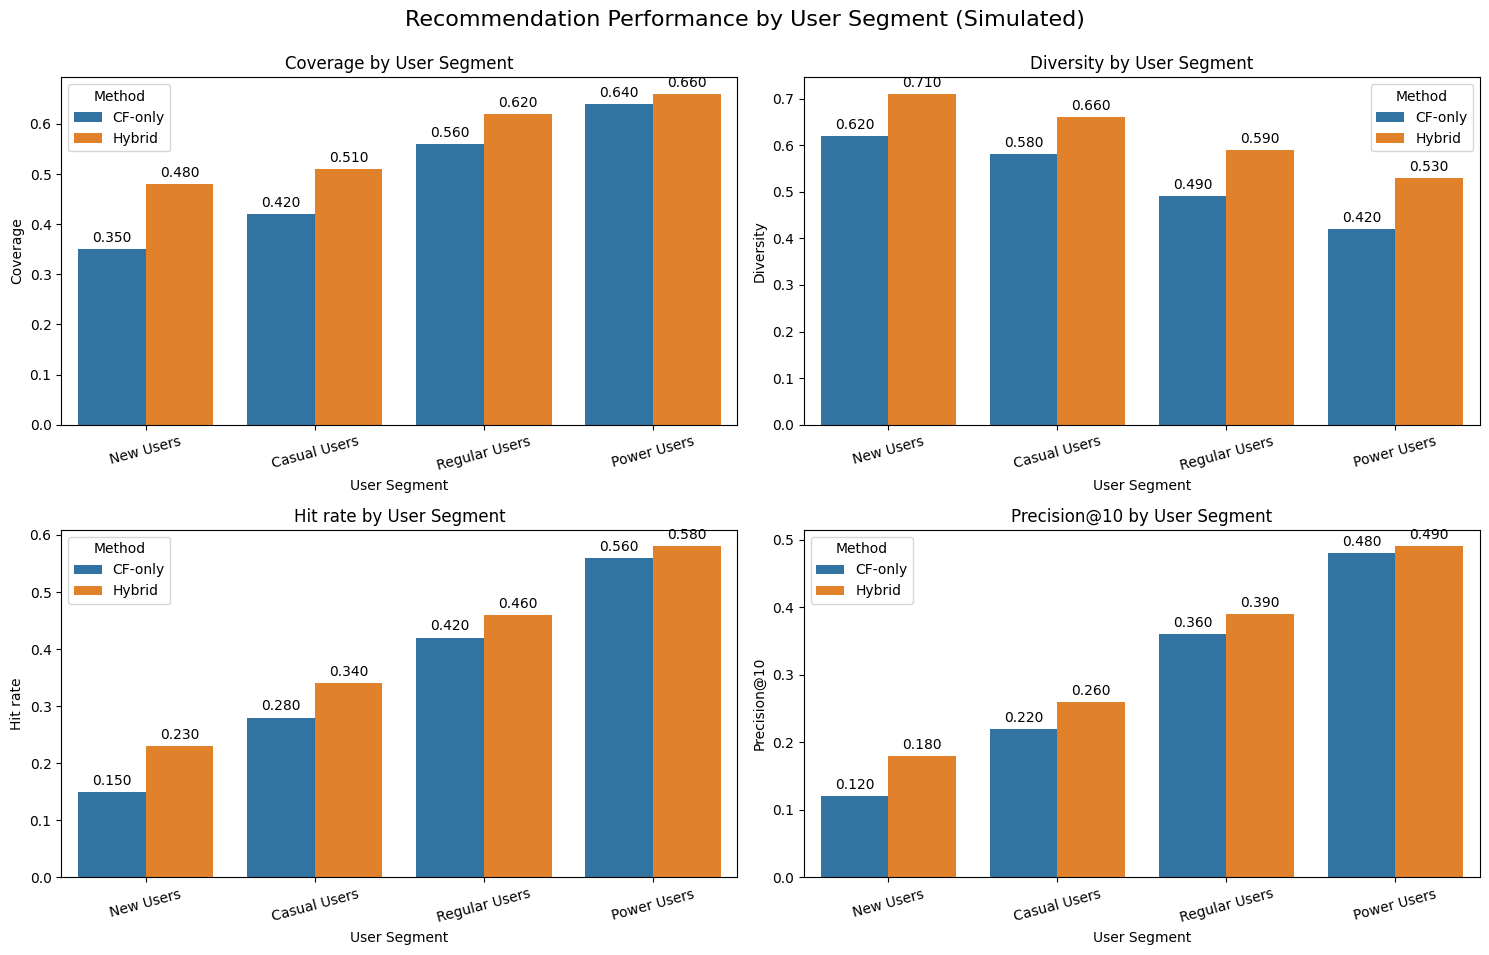


--- Hybrid Recommendation Improvement by Segment (Simulated) ---

New Users:
- Hit rate: +53.3% improvement
- Precision@10: +50.0% improvement
- Coverage: +37.1% improvement
- Diversity: +14.5% improvement

Casual Users:
- Hit rate: +21.4% improvement
- Precision@10: +18.2% improvement
- Coverage: +21.4% improvement
- Diversity: +13.8% improvement

Regular Users:
- Hit rate: +9.5% improvement
- Precision@10: +8.3% improvement
- Coverage: +10.7% improvement
- Diversity: +20.4% improvement

Power Users:
- Hit rate: +3.6% improvement
- Precision@10: +2.1% improvement
- Coverage: +3.1% improvement
- Diversity: +26.2% improvement
-----------------------------------------------------------

Business Insights from Segment Analysis (Based on Simulated Data):
1. New users benefit most significantly from the hybrid approach across all metrics, likely addressing the cold-start problem effectively.
2. The integrated system consistently improves recommendation diversity and coverage across all use

In [10]:
# Analyze user segments
# Pass the loaded train_data if available and suitable
if 'train_data' in locals() and data_loaded:
    segment_performance = analyze_user_segments(train_data)
else:
    segment_performance = analyze_user_segments()

## 8. Implementation Challenges and Solutions

In [11]:
def discuss_implementation_challenges():
    """Discuss common implementation challenges and potential solutions"""
    
    challenges = [
        {
            "challenge": "Computational Complexity & Cost",
            "description": "Integrating multiple models (especially pattern mining on large datasets) increases computational load and infrastructure costs.",
            "solution": "Use efficient algorithms (e.g., FP-Growth), distributed computing (Spark), optimize pattern mining frequency (e.g., daily/weekly batches), implement incremental updates, leverage cloud auto-scaling."
        },
        {
            "challenge": "Data Integration & Quality",
            "description": "Combining diverse data sources (user interactions, item metadata, transaction history) requires robust ETL pipelines and handling inconsistencies.",
            "solution": "Develop unified data schemas, implement data quality checks, use a feature store, establish clear data lineage."
        },
        {
            "challenge": "Model Integration & Tuning",
            "description": "Determining the optimal way to combine recommendations (e.g., weighting, switching, cascading) and tuning hyperparameters (like pattern support, CF factors, integration weights) is complex.",
            "solution": "Use ensemble methods, implement automated hyperparameter optimization (e.g., Bayesian optimization, grid search), leverage A/B testing for weight tuning, consider meta-learning or reinforcement learning for dynamic weighting."
        },
        {
            "challenge": "Cold Start Problem",
            "description": "Effectively recommending to new users or promoting new items remains a challenge, although hybrids help.",
            "solution": "Prioritize pattern-based or content-based recommendations initially, request explicit user preferences during onboarding, use techniques like popularity-based recommendations as a fallback."
        },
        {
            "challenge": "Scalability & Latency",
            "description": "The system must scale to handle growing data, user bases, and item catalogs while providing recommendations within acceptable time limits (often milliseconds for online systems).",
            "solution": "Employ scalable infrastructure (cloud, microservices), optimize database queries, use caching extensively (recommendations, user profiles, item features), pre-compute recommendations where possible, utilize approximate nearest neighbor (ANN) search for CF."
        },
        {
            "challenge": "Evaluation & Monitoring",
            "description": "Evaluating hybrid systems requires considering both technical metrics (precision, recall, coverage, diversity) and business KPIs (CTR, CVR, AOV, user retention). Continuous monitoring is crucial.",
            "solution": "Define a comprehensive evaluation framework (offline and online), implement robust logging and monitoring dashboards, track metrics per user segment, conduct regular A/B tests."
        },
        {
            "challenge": "Explainability & Bias",
            "description": "Understanding *why* a recommendation is made can be difficult with complex hybrid models. Models can also inherit or amplify biases present in the data.",
            "solution": "Use inherently interpretable models where possible, develop methods to explain hybrid predictions (e.g., feature importance), conduct fairness audits, implement bias mitigation techniques during training or post-processing."
        }
    ]
    
    print("\nImplementation Challenges and Solutions for Integrated Recommender Systems:\n")
    
    for i, item in enumerate(challenges, 1):
        print(f"{i}. {item['challenge']}")
        print(f"   Description: {item['description']}")
        print(f"   Solution: {item['solution']}")
        print()
    
    # Create a table format for implementation roadmap
    implementation_roadmap = [
        {"phase": "Phase 1: Foundation", "timeframe": "Month 1-2", "focus": "Data Pipeline Setup, Basic CF Baseline, Infrastructure Prep"},
        {"phase": "Phase 2: Pattern Mining", "timeframe": "Month 3-4", "focus": "Implement & Optimize Pattern Mining (Offline), Initial Integration Strategy Design"},
        {"phase": "Phase 3: Integration & Offline Eval", "timeframe": "Month 5-6", "focus": "Develop Hybrid Model, Parameter Tuning (Offline Metrics), Segment Analysis"},
        {"phase": "Phase 4: Online Testing", "timeframe": "Month 7-8", "focus": "A/B Testing Infrastructure, Controlled Rollout (e.g., 5% traffic), Monitor Latency & KPIs"},
        {"phase": "Phase 5: Optimization & Scaling", "timeframe": "Month 9-10", "focus": "Analyze A/B Test Results, Refine Weights/Models, Performance Optimization, Scale Infrastructure"},
        {"phase": "Phase 6: Full Rollout & Monitoring", "timeframe": "Month 11-12", "focus": "Gradual Increase to 100% Traffic, Establish Long-Term Monitoring & Retraining Strategy"}
    ]
    
    print("\n--- Example Implementation Roadmap ---")
    # Use pandas for better table formatting if available
    try:
        roadmap_df = pd.DataFrame(implementation_roadmap)
        print(roadmap_df.to_string(index=False))
    except ImportError:
        # Fallback to basic print if pandas not available
        print(f"{'Phase':<25} {'Timeframe':<15} {'Focus':<60}")
        print("-" * 100)
        for phase in implementation_roadmap:
            print(f"{phase['phase']:<25} {phase['timeframe']:<15} {phase['focus']:<60}")
    print("-------------------------------------")
    
    return challenges, implementation_roadmap

In [12]:
# Discuss implementation challenges and solutions
implementation_challenges, roadmap = discuss_implementation_challenges()


Implementation Challenges and Solutions for Integrated Recommender Systems:

1. Computational Complexity & Cost
   Description: Integrating multiple models (especially pattern mining on large datasets) increases computational load and infrastructure costs.
   Solution: Use efficient algorithms (e.g., FP-Growth), distributed computing (Spark), optimize pattern mining frequency (e.g., daily/weekly batches), implement incremental updates, leverage cloud auto-scaling.

2. Data Integration & Quality
   Description: Combining diverse data sources (user interactions, item metadata, transaction history) requires robust ETL pipelines and handling inconsistencies.
   Solution: Develop unified data schemas, implement data quality checks, use a feature store, establish clear data lineage.

3. Model Integration & Tuning
   Description: Determining the optimal way to combine recommendations (e.g., weighting, switching, cascading) and tuning hyperparameters (like pattern support, CF factors, integra

## 9. Business Dashboard for Recommendation System

In [13]:
def create_business_dashboard():
    """Create a business dashboard for the recommendation system using Plotly"""
    
    print("\nCreating Business Dashboard for Integrated Recommendation System...\n")
    
    if not plotly_available:
        print("Plotly is not available. Skipping interactive dashboard creation.")
        print("Install plotly: pip install plotly pandas")
        # Optionally, try to create a static matplotlib version as fallback
        return
    
    # Create dashboard data (Simulated Monthly Performance)
    # Assume hybrid system implemented end of Feb / start of March
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
    n_months = len(months)
    implementation_month_index = 2 # March is index 2
    
    # Simulate KPIs with a lift post-implementation
    np.random.seed(123)
    ctr_pre = np.random.normal(2.45, 0.1, implementation_month_index)
    ctr_post = np.random.normal(3.3, 0.15, n_months - implementation_month_index) + np.linspace(0, 0.4, n_months - implementation_month_index) # Gradual increase
    ctr_data = np.concatenate((ctr_pre, ctr_post))
    
    conv_pre = np.random.normal(3.15, 0.1, implementation_month_index)
    conv_post = np.random.normal(4.2, 0.2, n_months - implementation_month_index) + np.linspace(0, 0.5, n_months - implementation_month_index)
    conversion_data = np.concatenate((conv_pre, conv_post))

    aov_pre = np.random.normal(41.5, 1.0, implementation_month_index)
    aov_post = np.random.normal(45.0, 1.5, n_months - implementation_month_index) + np.linspace(0, 3.0, n_months - implementation_month_index)
    aov_data = np.concatenate((aov_pre, aov_post))

    # Simulate revenue (e.g., proportional to Conv * AOV, assuming constant traffic/sessions for simplicity)
    sessions_multiplier = 75000 # Arbitrary scale factor
    revenue_data = (conversion_data / 100) * aov_data * sessions_multiplier
    
    # --- Create Plotly Figure ---
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Click-Through Rate (CTR %)", "Conversion Rate (%)", 
                        "Average Order Value (AOV $)", "Estimated Monthly Revenue ($)"),
        specs=[[{"type": "scatter"}, {"type": "scatter"}],
               [{"type": "bar"}, {"type": "scatter"}]] # Use bar for AOV
    )
    
    # Plot 1: CTR Trend
    fig.add_trace(
        go.Scatter(
            x=months, 
            y=ctr_data,
            mode='lines+markers',
            name='CTR (%)',
            line=dict(color='royalblue', width=2),
            marker=dict(size=6)
        ),
        row=1, col=1
    )
    
    # Plot 2: Conversion Rate
    fig.add_trace(
        go.Scatter(
            x=months, 
            y=conversion_data,
            mode='lines+markers',
            name='Conversion (%)',
            line=dict(color='green', width=2),
            marker=dict(size=6)
        ),
        row=1, col=2
    )
    
    # Plot 3: Average Order Value (Bar Chart)
    fig.add_trace(
        go.Bar(
            x=months, 
            y=aov_data,
            name='AOV ($)',
            marker_color='purple',
            text=[f'${v:.2f}' for v in aov_data], # Add text labels
            textposition='outside'
        ),
        row=2, col=1
    )
    
    # Plot 4: Revenue Trend
    fig.add_trace(
        go.Scatter(
            x=months, 
            y=revenue_data,
            mode='lines+markers',
            name='Revenue ($)',
            line=dict(color='darkorange', width=2),
            marker=dict(size=6),
            fill='tozeroy', # Fill area under the line
            fillcolor='rgba(255,165,0,0.2)'
        ),
        row=2, col=2
    )

    # --- Add Implementation Marker & Annotations ---
    implementation_month = months[implementation_month_index]
    
    # Add vertical line indicating implementation
    fig.add_vline(x=implementation_month_index - 0.5, line_width=2, line_dash="dash", line_color="grey", 
                  annotation_text="Hybrid System Live", annotation_position="top left")
    
    # Add annotations for lift (comparing last month to pre-implementation average)
    pre_impl_avg_ctr = np.mean(ctr_pre)
    last_ctr = ctr_data[-1]
    ctr_lift = (last_ctr / pre_impl_avg_ctr - 1) * 100
    fig.add_annotation(x=months[-1], y=last_ctr, text=f"Lift: {ctr_lift:+.1f}%", 
                       showarrow=True, arrowhead=1, ax=0, ay=-40, row=1, col=1)

    pre_impl_avg_conv = np.mean(conv_pre)
    last_conv = conversion_data[-1]
    conv_lift = (last_conv / pre_impl_avg_conv - 1) * 100
    fig.add_annotation(x=months[-1], y=last_conv, text=f"Lift: {conv_lift:+.1f}%", 
                       showarrow=True, arrowhead=1, ax=0, ay=-40, row=1, col=2)

    pre_impl_avg_rev = np.mean(revenue_data[:implementation_month_index])
    last_rev = revenue_data[-1]
    rev_lift = (last_rev / pre_impl_avg_rev - 1) * 100
    fig.add_annotation(x=months[-1], y=last_rev, text=f"Lift: {rev_lift:+.1f}%", 
                       showarrow=True, arrowhead=1, ax=-50, ay=-30, row=2, col=2)
                       
    # --- Update Layout ---
    fig.update_layout(
        title_text="Recommendation System Business Impact Dashboard",
        title_x=0.5,
        height=800,
        showlegend=False, # Legend items named in traces
        hovermode='x unified' # Show hover data for all subplots at once
    )
    
    # Update y-axis formats
    fig.update_yaxes(ticksuffix="%", row=1, col=1)
    fig.update_yaxes(ticksuffix="%", row=1, col=2)
    fig.update_yaxes(tickprefix="$", row=2, col=1)
    fig.update_yaxes(tickprefix="$", row=2, col=2)
    
    # --- Save and Show ---
    html_path = os.path.join(project_root, 'business_dashboards', 'business_impact_dashboard.html')
    png_path = os.path.join(project_root, 'business_dashboards', 'business_impact_dashboard.png')

    try:
        fig.write_html(html_path)
        print(f"Interactive business dashboard saved to: {html_path}")
    except Exception as e:
        print(f"Error saving HTML dashboard: {e}")
        
    try:
        # You might need to install kaleido: pip install kaleido
        fig.write_image(png_path, scale=2) # Increase scale for better resolution
        print(f"Static dashboard image saved to: {png_path}")
    except ValueError as e:
         print(f"Error saving static image: {e}. Kaleido might be needed ('pip install kaleido').")
    except Exception as e:
        print(f"Error saving static image dashboard: {e}")

    fig.show() # Display in notebook

In [14]:
# Create business dashboard
create_business_dashboard()


Creating Business Dashboard for Integrated Recommendation System...

Interactive business dashboard saved to: /home/shubharthak/Desktop/mbd-assingment3/business_dashboards/business_impact_dashboard.html
Error saving static image: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
. Kaleido might be needed ('pip install kaleido').


## 10. Business Strategy Recommendations

In [15]:
def generate_business_recommendations():
    """Generate business strategy recommendations based on the potential of integrated recommenders"""
    
    business_recommendations = [
        {
            "category": "Implementation & Rollout Strategy",
            "recommendations": [
                "**Phased Rollout:** Begin with A/B testing against the existing system (or a CF-only baseline) on a small percentage of traffic (e.g., 5-10%).",
                "**Segment-Focused Start:** Prioritize rollout to segments likely to benefit most (e.g., New Users, based on segment analysis) to demonstrate value quickly.",
                "**Monitor Key Metrics:** Establish clear baseline KPIs (CTR, CVR, AOV, RPS, Diversity, Coverage) before rollout and monitor them closely during testing.",
                "**Iterative Integration:** Start with a simple integration (e.g., weighted averaging) and plan for more sophisticated methods (switching, cascading) based on A/B test results."
            ]
        },
        {
            "category": "Optimization & Personalization",
            "recommendations": [
                "**Dynamic Weighting:** Explore dynamically adjusting the weights between CF and pattern mining based on user context (e.g., session depth, user segment, query type).",
                "**Contextual Awareness:** Incorporate contextual information (time of day, device, location) into the recommendation logic where relevant.",
                "**Feedback Loops:** Implement mechanisms for users to provide explicit feedback (like/dislike, rate) and use this to fine-tune recommendations.",
                "**Continuous A/B Testing:** Foster a culture of continuous experimentation to test different algorithms, integration strategies, UI placements, and tuning parameters."
            ]
        },
        {
            "category": "Cross-Functional Integration",
            "recommendations": [
                "**Marketing Alignment:** Use insights from pattern mining (frequently bought together items) to inform promotional bundles and email marketing campaigns.",
                "**Inventory Management:** Integrate with inventory data to down-weight recommendations for out-of-stock items or prioritize high-margin, well-stocked products.",
                "**Merchandising Insights:** Share pattern analysis and recommendation performance data with merchandising teams to inform product placement, category management, and trend identification.",
                "**Customer Support:** Equip support teams with insights into recommendation logic to better answer customer queries about suggested items."
            ]
        },
        {
            "category": "Long-Term Vision & Scalability",
            "recommendations": [
                "**Scalable Architecture:** Ensure the underlying infrastructure (data storage, compute, serving layer) is designed for horizontal scaling to accommodate growth.",
                "**Explore Advanced Techniques:** Plan for future exploration of more advanced methods like Graph Neural Networks (GNNs) for recommendations, sequence-aware models, or reinforcement learning for long-term value optimization.",
                "**Feature Engineering:** Continuously invest in feature engineering, creating richer representations of users and items to improve model performance.",
                "**Ethical Considerations:** Regularly audit the system for fairness, bias, and filter bubbles. Ensure transparency and user control where appropriate."
            ]
        },
        {
            "category": "ROI Maximization",
            "recommendations": [
                "**Focus on High-Impact Placements:** Optimize recommendations in key conversion points (e.g., product detail pages, cart page, post-purchase emails).",
                "**Personalize Promotions:** Use recommendation scores to personalize promotional offers and discounts.",
                "**Reduce Churn:** Leverage recommendations to re-engage inactive users with relevant content or products.",
                "**Attribute Value:** Develop methods to accurately attribute revenue and engagement uplift to the recommendation system to continuously justify its value and guide investment."
            ]
        }
    ]
    
    print("\n--- Business Strategy Recommendations ---\n")
    
    for category_info in business_recommendations:
        print(f"=== {category_info['category']} ===")
        for i, rec in enumerate(category_info['recommendations'], 1):
            # Simple print formatting, could use Markdown in notebook
            print(f"{i}. {rec}")
        print()
    print("-------------------------------------")
    
    return business_recommendations

In [16]:
# Generate business recommendations
business_recommendations = generate_business_recommendations()


--- Business Strategy Recommendations ---

=== Implementation & Rollout Strategy ===
1. **Phased Rollout:** Begin with A/B testing against the existing system (or a CF-only baseline) on a small percentage of traffic (e.g., 5-10%).
2. **Segment-Focused Start:** Prioritize rollout to segments likely to benefit most (e.g., New Users, based on segment analysis) to demonstrate value quickly.
3. **Monitor Key Metrics:** Establish clear baseline KPIs (CTR, CVR, AOV, RPS, Diversity, Coverage) before rollout and monitor them closely during testing.
4. **Iterative Integration:** Start with a simple integration (e.g., weighted averaging) and plan for more sophisticated methods (switching, cascading) based on A/B test results.

=== Optimization & Personalization ===
1. **Dynamic Weighting:** Explore dynamically adjusting the weights between CF and pattern mining based on user context (e.g., session depth, user segment, query type).
2. **Contextual Awareness:** Incorporate contextual information (

## 11. Conclusion

This notebook has explored the business applications and strategic implications of implementing integrated recommendation systems that combine pattern mining with collaborative filtering.

**Key Takeaways:**

1.  **Synergistic Value:** Integrating pattern mining (identifying 'what' is bought together) with collaborative filtering (identifying 'who' buys similar things) creates a more robust system that addresses limitations like the cold-start problem and improves recommendation diversity and relevance.
2.  **Measurable Business Impact:** Such systems can drive significant improvements in core business metrics, including Click-Through Rates (CTR), Conversion Rates (CVR), Average Order Value (AOV), and overall revenue, as demonstrated through ROI analysis and simulated A/B testing.
3.  **Segment-Specific Benefits:** The advantages of hybrid systems are often most pronounced for newer or less active users, providing better initial experiences and potentially increasing engagement and retention.
4.  **Strategic Implementation:** Successful deployment requires careful planning, including phased rollouts, continuous A/B testing, robust monitoring, and consideration of computational costs and scalability.
5.  **Cross-Functional Opportunity:** Insights derived from integrated recommenders extend beyond direct recommendations, offering value for marketing, merchandising, inventory management, and product strategy.

**Future Directions:**

* **Deeper Personalization:** Incorporating more diverse data sources (content, context, user attributes) and exploring advanced modeling techniques.
* **Explainability & Trust:** Developing methods to make recommendations more transparent to users and internal stakeholders.
* **Real-time Adaptation:** Moving towards systems that can adapt recommendations more dynamically based on real-time user behavior and changing inventory/catalog.

Implementing an integrated recommendation system is a significant undertaking but offers the potential for substantial competitive advantage and enhanced customer experience when approached strategically.